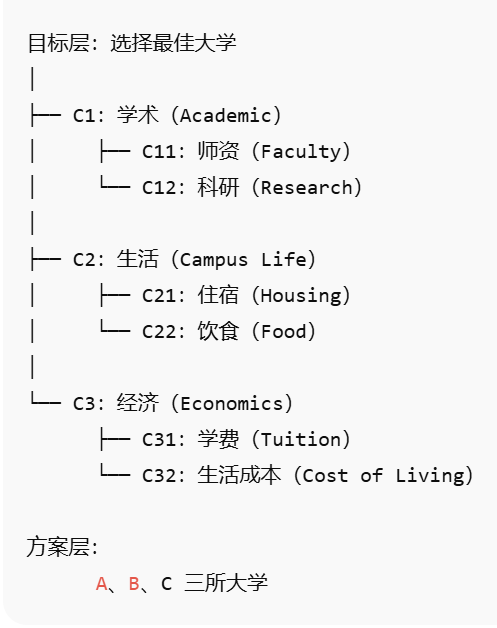

In [1]:
import numpy as np

定义计算函数（权重+一致性检验）

In [2]:
def ahp_weight(matrix):
    """
    输入：判断矩阵
    输出：权重向量、CI、CR、是否通过一致性检验
    """
    matrix = np.array(matrix, dtype=float)
    n = matrix.shape[0]

    # 1. 计算特征向量
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    max_index = np.argmax(eigenvalues.real)
    max_eigenvalue = eigenvalues.real[max_index]
    weight = eigenvectors[:, max_index].real
    weight = weight / np.sum(weight)

    # 2. 一致性指标 CI
    CI = (max_eigenvalue - n) / (n - 1)

    # 3. 随机一致性指标 RI
    RI_dict = {1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12,
               6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45}
    RI = RI_dict[n]

    # 4. 一致性比例 CR
    CR = CI / RI if RI != 0 else 0

    return weight, CI, CR, (CR < 0.1)


一级决策层

In [4]:
C = [
    [1,   3,   5],
    [1/3, 1,   3],
    [1/5, 1/3, 1]
]


二级决策层

In [5]:
C1 = [
    [1, 3],
    [1/3, 1]
]
C2 = [
    [1, 1/3],
    [3, 1]
]
C3 = [
    [1, 5],
    [1/5, 1]
]

方案层的得分

In [6]:
# C11: 师资
C11 = [
    [1, 3, 5],
    [1/3, 1, 3],
    [1/5, 1/3, 1]
]

# C12: 科研
C12 = [
    [1, 2, 4],
    [1/2, 1, 3],
    [1/4, 1/3, 1]
]

# C21: 住宿
C21 = [
    [1, 1/3, 1/5],
    [3, 1, 1/3],
    [5, 3, 1]
]

# C22: 饮食
C22 = [
    [1, 3, 1/3],
    [1/3, 1, 1/5],
    [3, 5, 1]
]

# C31: 学费
C31 = [
    [1, 1/3, 3],
    [3, 1, 5],
    [1/3, 1/5, 1]
]

# C32: 生活成本
C32 = [
    [1, 5, 1/3],
    [1/5, 1, 1/7],
    [3, 7, 1]
]


计算权重，逐层计算

In [7]:
# 一级权重
w_C, _, _, _ = ahp_weight(C)
print("一级权重 C1, C2, C3 =", w_C)

# 二级权重
w_C1, *_ = ahp_weight(C1)
w_C2, *_ = ahp_weight(C2)
w_C3, *_ = ahp_weight(C3)

# 方案层权重
w_C11, *_ = ahp_weight(C11)
w_C12, *_ = ahp_weight(C12)
w_C21, *_ = ahp_weight(C21)
w_C22, *_ = ahp_weight(C22)
w_C31, *_ = ahp_weight(C31)
w_C32, *_ = ahp_weight(C32)


一级权重 C1, C2, C3 = [0.63698557 0.25828499 0.10472943]


权重逐层合成，计算得分

In [8]:
# AHP 多层合成
# A, B, C 三个方案
final_scores = np.zeros(3)

# Academic
final_scores += w_C[0] * (w_C1[0] * w_C11 + w_C1[1] * w_C12)

# Life
final_scores += w_C[1] * (w_C2[0] * w_C21 + w_C2[1] * w_C22)

# Economics
final_scores += w_C[2] * (w_C3[0] * w_C31 + w_C3[1] * w_C32)

print("最终方案得分 A, B, C =", final_scores)
print("最佳方案是 =", ["A", "B", "C"][np.argmax(final_scores)])


最终方案得分 A, B, C = [0.47744675 0.26810433 0.25444892]
最佳方案是 = A
